In [2]:
import pandas as pd 
import csv


In [3]:
X_train = pd.read_csv(r"C:\Users\Hp\Desktop\GST Project\Train_60\Train_60\X_Train_Data_Input.csv")
y_train = pd.read_csv(r"C:\Users\Hp\Desktop\GST Project\Train_60\Train_60\Y_Train_Data_Target.csv")
X_test = pd.read_csv(r"C:\Users\Hp\Desktop\GST Project\Test_20\Test_20\X_Test_Data_Input.csv")
y_test = pd.read_csv(r"C:\Users\Hp\Desktop\GST Project\Test_20\Test_20\Y_Test_Data_Target.csv")

In [4]:

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [5]:
X_train= X_train.drop(columns=['ID'])
X_test= X_test.drop(columns=['ID'])
X_val= X_val.drop(columns=['ID'])
y_train = y_train['target']
y_test =y_test['target']
y_val = y_val['target']

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# Apply label encoding to each column
for column in X_train.columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le


In [7]:
for column in X_test.columns:
    le = LabelEncoder()
    X_test[column] = le.fit_transform(X_test[column])
    label_encoders[column] = le


In [8]:
for column in X_val.columns:
    le = LabelEncoder()
    X_val[column] = le.fit_transform(X_val[column])
    label_encoders[column] = le


In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
gb_clf = GradientBoostingClassifier()

# Fit Gradient Boosting model
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [11]:
gb_train_preds = gb_clf.predict_proba(X_train)[:, 1]
gb_val_preds = gb_clf.predict_proba(X_val)[:, 1]
gb_test_preds = gb_clf.predict_proba(X_test)[:, 1]

In [12]:
import numpy as np
X_train_hybrid = np.hstack((X_train, gb_train_preds.reshape(-1, 1)))
X_val_hybrid = np.hstack((X_val, gb_val_preds.reshape(-1, 1)))
X_test_hybrid = np.hstack((X_test, gb_test_preds.reshape(-1, 1)))

In [13]:
svm_clf = make_pipeline(StandardScaler(), SVC(probability=True))

# Fit SVM model on combined features
svm_clf.fit(X_train_hybrid, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

In [14]:
# Predict and evaluate the hybrid model
y_val_pred = svm_clf.predict(X_val_hybrid)
y_test_pred = svm_clf.predict(X_test_hybrid)

In [15]:
# Print Accuracy
print(f'Validation Accuracy: {accuracy_score(y_val, y_val_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred)}')

Validation Accuracy: 0.9743636771209064
Test Accuracy: 0.9757290456685211


In [16]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    roc_auc_score
)

# For validation set
y_val_pred_proba = svm_clf.predict_proba(X_val_hybrid)[:, 1]  # Get probabilities for ROC AUC
y_val_pred = svm_clf.predict(X_val_hybrid)  # Get class predictions

print("Validation Set Metrics:")
print(f'Accuracy: {accuracy_score(y_val, y_val_pred)}')
print(f'Precision: {precision_score(y_val, y_val_pred)}')
print(f'Recall: {recall_score(y_val, y_val_pred)}')
print(f'F1 Score: {f1_score(y_val, y_val_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_val, y_val_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_val, y_val_pred_proba)}')


Validation Set Metrics:
Accuracy: 0.9743636771209064
Precision: 0.8005741455100027
Recall: 0.9682109146142996
F1 Score: 0.8764486348458064
Confusion Matrix:
[[173404   4446]
 [   586  17848]]
ROC AUC Score: 0.9916201577624116


In [17]:
# For test set
y_test_pred_proba = svm_clf.predict_proba(X_test_hybrid)[:, 1]  # Get probabilities for ROC AUC
y_test_pred = svm_clf.predict(X_test_hybrid)  # Get class predictions

print("\nTest Set Metrics:")
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'Precision: {precision_score(y_test, y_test_pred)}')
print(f'Recall: {recall_score(y_test, y_test_pred)}')
print(f'F1 Score: {f1_score(y_test, y_test_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_test_pred_proba)}')



Test Set Metrics:
Accuracy: 0.9757290456685211
Precision: 0.8175863025093582
Recall: 0.9558716265499635
F1 Score: 0.881337567719036
Confusion Matrix:
[[231771   5263]
 [  1089  23589]]
ROC AUC Score: 0.9919596363667306


In [18]:
import matplotlib.pyplot as plt

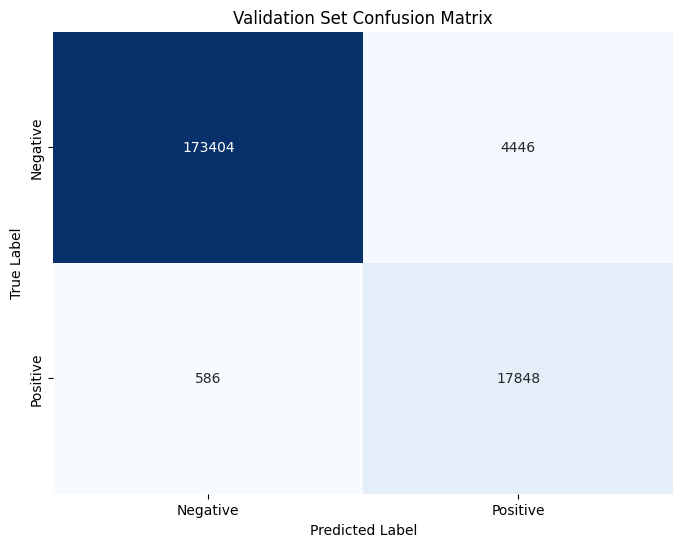

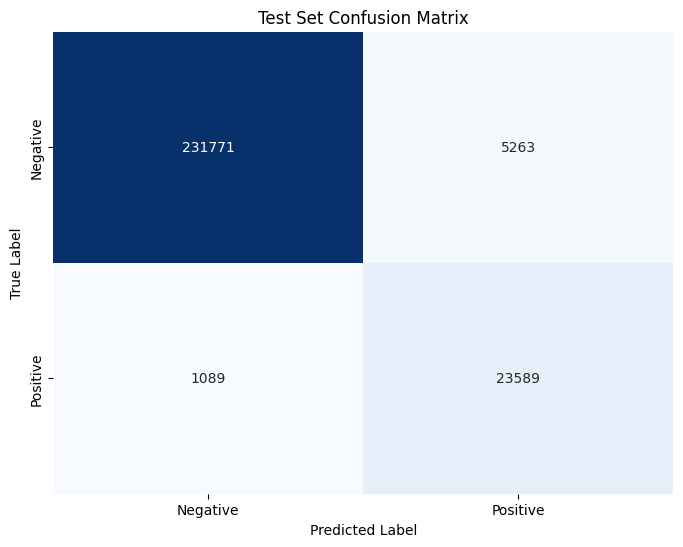

In [19]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# For validation set
plot_confusion_matrix(y_val, y_val_pred, title='Validation Set Confusion Matrix')

# For test set
plot_confusion_matrix(y_test, y_test_pred, title='Test Set Confusion Matrix')


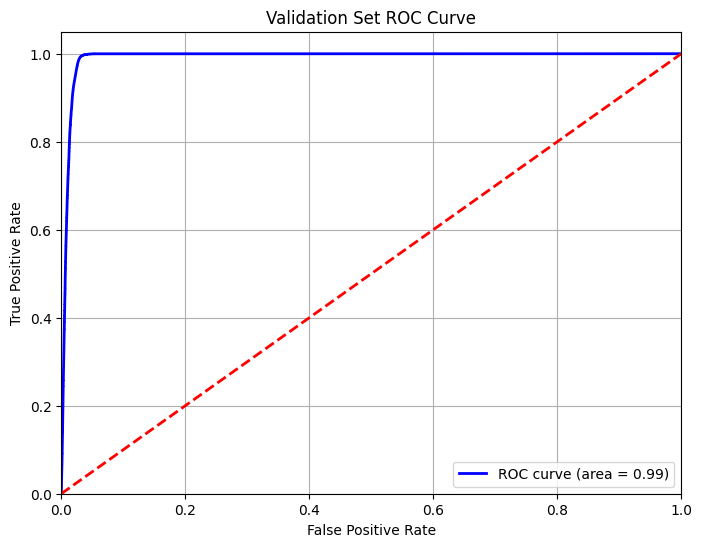

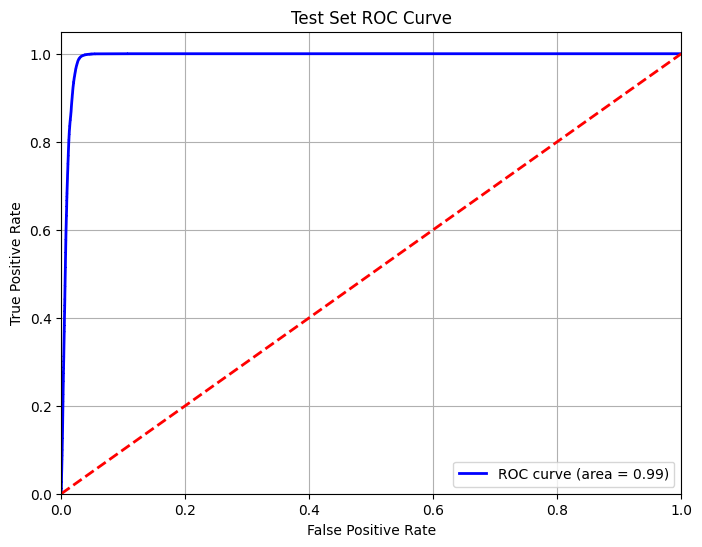

In [21]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_proba, title='ROC Curve'):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# For validation set

plot_roc_curve(y_val, y_val_pred_proba, title='Validation Set ROC Curve')

# For test set

plot_roc_curve(y_test, y_test_pred_proba, title='Test Set ROC Curve')


In [22]:
f1_test = f1_score(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)

# Calculate metrics for the validation set
f1_val = f1_score(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)

# Data for plotting
metrics = ['F1 Score', 'Accuracy', 'Precision']
test_scores = [f1_test, accuracy_test, precision_test]
val_scores = [f1_val, accuracy_val, precision_val]

Text(0.5, 1.0, 'Performance Metrics on Test Set')

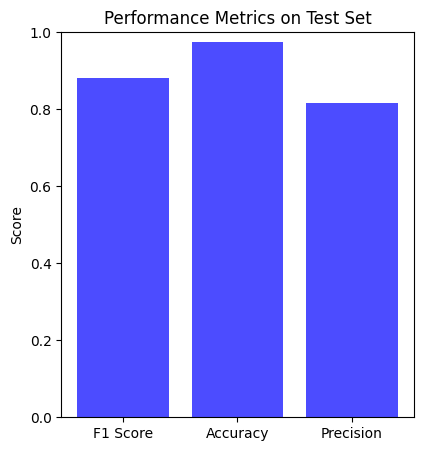

In [23]:
x = range(len(metrics))
plt.figure(figsize=(10, 5))

# Plot for Test Set
plt.subplot(1, 2, 1)
plt.bar(x, test_scores, color='blue', alpha=0.7, label='Test Set')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Metrics on Test Set')

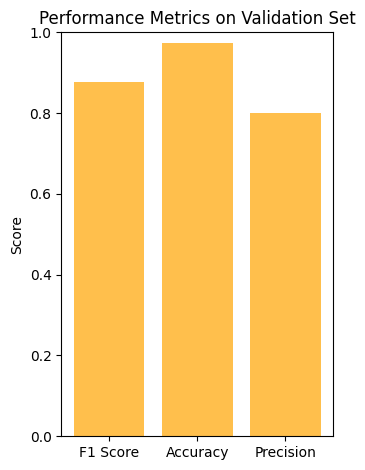

In [24]:
plt.subplot(1, 2, 2)
plt.bar(x, val_scores, color='orange', alpha=0.7, label='Validation Set')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Metrics on Validation Set')

plt.tight_layout()
plt.show()